# TEL_OHE_v.s_EE

In [87]:
# 相關套件載入
import pandas as pd
import numpy as np
import random as rn
import pydotplus # 繪製tensflow圖
import graphviz # 繪製tensflow圖


from tensorflow.keras.layers import Embedding, Dropout, Input, Dense, Reshape, Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [19]:
# 讀取資料
tel = pd.read_excel('C:/Users/hsu/Desktop/data/ess_data/OHEDATA.xlsx')
df = tel.copy()

In [20]:
# 'Account Length'欄位不需動用予以刪除
df = df.drop('Account Length', axis = 1)

In [21]:
# 將原先特徵資料轉為數值代表資料
di = dict(zip(df['State'].value_counts().index,range(0,51)))
for i, j in di.items():
    df['State'] = df['State'].replace({str(i):j})


df['Area Code'] = df['Area Code'].replace({415:0, 510:1, 408:2})
df['Intl Plan'] = df['Intl Plan'].replace({'no':0,'yes':1})
df['VMail Plan'] = df['VMail Plan'].replace({'no':0, 'yes':1})

In [22]:
dfx = df.iloc[:,:-1]
dfy = df[['churn']]

In [23]:
# 將特徵與目標變數轉為EE置入格式
tx = []
for i in dfx.columns:
    f = np.array(dfx[i]).reshape(3333,1)
    tx.append(f)

ty = np.array([i for i in dfy['churn']]).reshape(3333,1)    

# 撰寫EntityEmbedding函數

In [24]:
# 撰寫EE運作函數
sample_num = 3333 # 觀察值為32
cate_feature_num = 4 # 類別特徵 4
contious_feature_num = 14 # 數值特徵 6
cate_embedding_dimension = {'0':8, '1':3, '2':2, '3':2} # EE轉換後特徵


def build_embedding_network():
 
    '''
    通常寫法會將dataframe資料調整，將類別變數放置dataframe前面位置
    ''' 
    
    inputs = []
    embeddings = []
    
    ### 所有dataframe的特徵都需寫進行E.E中，一個資料集如有3個欄位(2個類別特徵，1個數值特徵)
    ### 就必須寫3次。通常為了後續容易了解，我們先將類別的向量嵌入寫在前面，
    ### 而且需增加Embedding嵌入資料，再用Reshape拉直。
    ### 數值資料只需增加Dense
    
    input_cate_feature_1 = Input(shape=(1,))
    embedding = Embedding(51, 8, input_length=1, name = 'state')(input_cate_feature_1) # name可以命名該層名稱
    # embedding後是10*1*3，為了後續计算方便，因此使用Reshape轉為10*3(易使後續concat)
    embedding = Reshape(target_shape=(8,))(embedding)
    inputs.append(input_cate_feature_1)
    embeddings.append(embedding)
    
    input_cate_feature_2 = Input(shape=(1,))
    embedding = Embedding(3, 3, input_length=1, name = 'area_code')(input_cate_feature_2)
    embedding = Reshape(target_shape=(3,))(embedding)
    inputs.append(input_cate_feature_2)
    embeddings.append(embedding)
    
    input_cate_feature_3 = Input(shape=(1,))
    embedding = Embedding(2, 2, input_length=1, name = 'international_plan')(input_cate_feature_3)
    embedding = Reshape(target_shape=(2,))(embedding)
    inputs.append(input_cate_feature_3)
    embeddings.append(embedding)
    
    input_cate_feature_4 = Input(shape=(1,))
    embedding = Embedding(2, 2, input_length=1, name = 'voice_mail_plan')(input_cate_feature_4)
    embedding = Reshape(target_shape=(2,))(embedding)
    inputs.append(input_cate_feature_4)
    embeddings.append(embedding)
    
    input_numeric_1 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_1) 
    inputs.append(input_numeric_1)
    embeddings.append(embedding_numeric)
    
    input_numeric_2 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_2) 
    inputs.append(input_numeric_2)
    embeddings.append(embedding_numeric)
    
    input_numeric_3 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_3) 
    inputs.append(input_numeric_3)
    embeddings.append(embedding_numeric)
    
    input_numeric_4 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_4) 
    inputs.append(input_numeric_4)
    embeddings.append(embedding_numeric)
    
    
    input_numeric_5 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_5) 
    inputs.append(input_numeric_5)
    embeddings.append(embedding_numeric)
    
    input_numeric_6 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_6) 
    inputs.append(input_numeric_6)
    embeddings.append(embedding_numeric)
    
    input_numeric_7 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_7) 
    inputs.append(input_numeric_7)
    embeddings.append(embedding_numeric)
    
    input_numeric_8 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_8) 
    inputs.append(input_numeric_8)
    embeddings.append(embedding_numeric)
    
    input_numeric_9 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_9) 
    inputs.append(input_numeric_9)
    embeddings.append(embedding_numeric)
    
    input_numeric_10 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_10) 
    inputs.append(input_numeric_10)
    embeddings.append(embedding_numeric)
    
    input_numeric_11 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_11) 
    inputs.append(input_numeric_11)
    embeddings.append(embedding_numeric)
    
    input_numeric_12 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_12) 
    inputs.append(input_numeric_12)
    embeddings.append(embedding_numeric)
    
    input_numeric_13 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_13) 
    inputs.append(input_numeric_13)
    embeddings.append(embedding_numeric)
    
    input_numeric_14 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric_14) 
    inputs.append(input_numeric_14)
    embeddings.append(embedding_numeric)   
       
    # 此一過程，再於將所有嵌入後的類別資料以及數值資料(不需調整)，拉成一條
    x = Concatenate()(embeddings)
    
    # 經過二層Dense
    x = Dense(50, activation='tanh')(x)
    #x = Dropout(.15)(x)
    x = Dense(30, activation='tanh')(x)
    #x = Dropout(.15)(x)
    
    # 最後進行output輸出
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, output)
 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [25]:
# 建立EE模型
NN = build_embedding_network()

In [32]:
# 訓練EE模型(accuracy儘量提升至0.95以上)
NN.fit(tx, ty, epochs=100, batch_size=100, verbose=1)

Train on 3333 samples
Epoch 1/100
3333/3333 [==============================] - 0s 35us/sample - loss: 0.1252 - accuracy: 0.9598
Epoch 2/100
3333/3333 [==============================] - 0s 40us/sample - loss: 0.1173 - accuracy: 0.9583
Epoch 3/100
3333/3333 [==============================] - 0s 35us/sample - loss: 0.1165 - accuracy: 0.9589
Epoch 4/100
3333/3333 [==============================] - 0s 36us/sample - loss: 0.0998 - accuracy: 0.9649
Epoch 5/100
3333/3333 [==============================] - 0s 31us/sample - loss: 0.0793 - accuracy: 0.9703
Epoch 6/100
3333/3333 [==============================] - 0s 35us/sample - loss: 0.0737 - accuracy: 0.9751
Epoch 7/100
3333/3333 [==============================] - 0s 35us/sample - loss: 0.0723 - accuracy: 0.9748
Epoch 8/100
3333/3333 [==============================] - 0s 37us/sample - loss: 0.0702 - accuracy: 0.9769
Epoch 9/100
3333/3333 [==============================] - 0s 41us/sample - loss: 0.0695 - accuracy: 0.9769
Epoch 10/100
3333/3333 [

3333/3333 [==============================] - 0s 39us/sample - loss: 0.0637 - accuracy: 0.9781
Epoch 78/100
3333/3333 [==============================] - 0s 37us/sample - loss: 0.0635 - accuracy: 0.9790
Epoch 79/100
3333/3333 [==============================] - 0s 49us/sample - loss: 0.0628 - accuracy: 0.9781
Epoch 80/100
3333/3333 [==============================] - 0s 35us/sample - loss: 0.0620 - accuracy: 0.9784
Epoch 81/100
3333/3333 [==============================] - 0s 36us/sample - loss: 0.0621 - accuracy: 0.9781
Epoch 82/100
3333/3333 [==============================] - 0s 36us/sample - loss: 0.0634 - accuracy: 0.9784
Epoch 83/100
3333/3333 [==============================] - 0s 37us/sample - loss: 0.0633 - accuracy: 0.9790
Epoch 84/100
3333/3333 [==============================] - 0s 37us/sample - loss: 0.0655 - accuracy: 0.9772
Epoch 85/100
3333/3333 [==============================] - 0s 36us/sample - loss: 0.0631 - accuracy: 0.9757
Epoch 86/100
3333/3333 [==========================

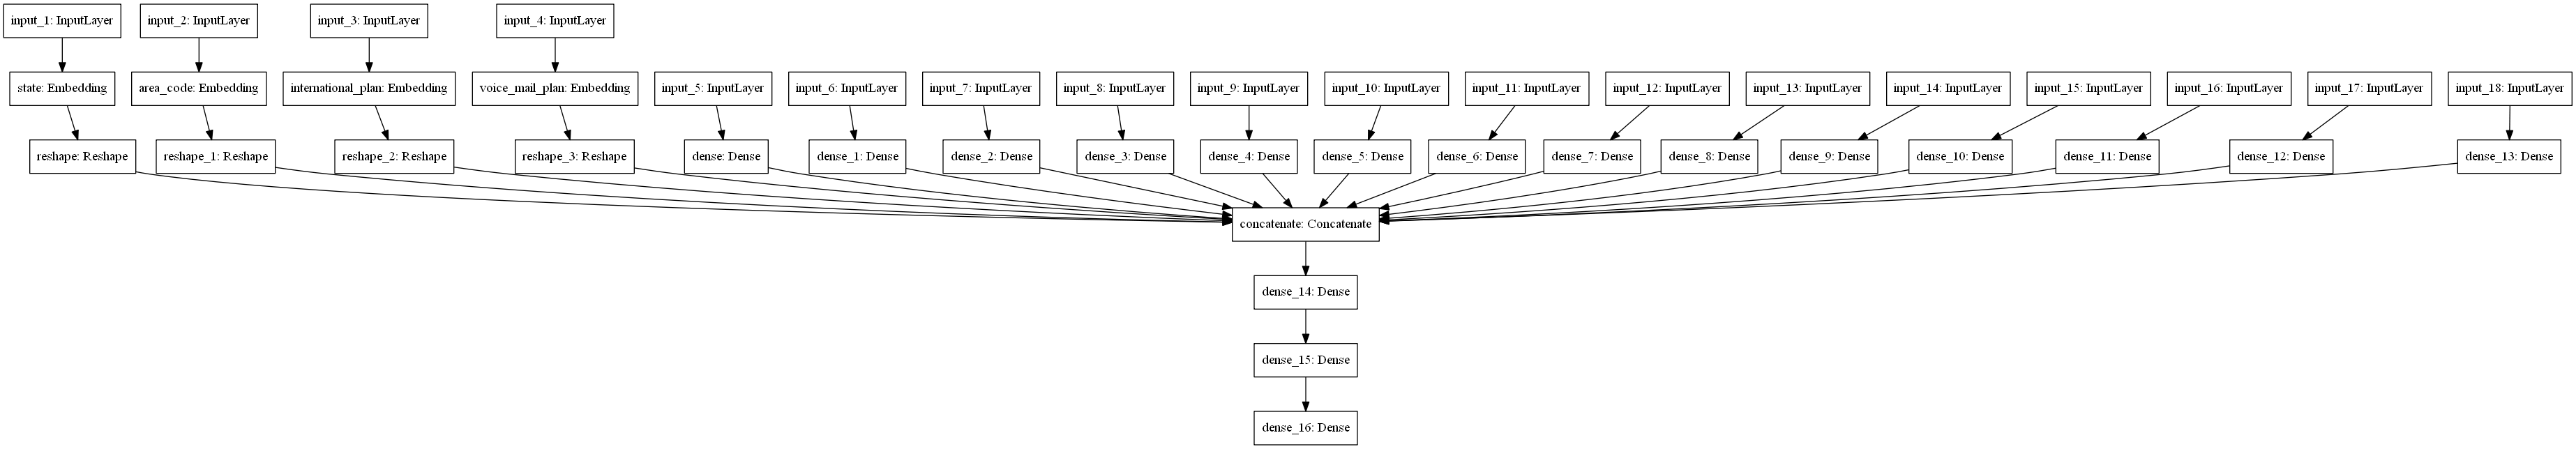

In [33]:
# 繪出tensflow模型，需要GraphViz以及pydotplus套件

import graphviz
import pydotplus

from tensorflow.keras.utils import plot_model
plot_model(NN, to_file='NN.png', show_layer_names=True)
# plot_model(NN, to_file='NN.png', show_shapes=True, show_layer_names=True) 完整寫法

In [34]:
model = NN  # 將訓練完成的模型存成物件
for i in range(cate_feature_num):
    # 由NN.png圖可知，如果把類別特徵放置在前、連續特徵放於後，cate_feature_num+i就是所有embedding層
    layer_name = NN.get_config()['layers'][cate_feature_num+i]['name']
 
    intermediate_layer_model = Model(inputs=NN.input,
                                     outputs=model.get_layer(layer_name).output)
    
    # numpy.array
    intermediate_output = intermediate_layer_model.predict(tx)
    
    intermediate_output.resize([3333,cate_embedding_dimension[str(i)]])
    
    if i == 0:
        X_embedding_trans = intermediate_output
    else:
        X_embedding_trans = np.hstack((X_embedding_trans,intermediate_output)) #水平拼接
    

# 取出原來的數值特徵
for i in range(contious_feature_num):
    if i == 0:
        X_contious = tx[cate_feature_num+i]
    else:
        X_contious = np.hstack((X_contious,tx[cate_feature_num+i]))

In [35]:
X_trans = np.hstack((X_embedding_trans,X_contious))

In [36]:
dfee = pd.DataFrame(X_trans)
EETEL = pd.concat([dfee, df[['churn']]], axis = 1)

In [ ]:
EETEL.to_excel('C:/Users/hsu/Desktop/EETEL.xlsx', index=False)

# 建立預測模型_EE

In [94]:
# 載入ML相關套件
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [39]:
# 資料切分(訓練、測試)
X = EETEL.drop('churn', axis = 1)
y = EETEL['churn']

In [40]:
# 資料標準化
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [41]:
# 隨機森林演算法
rfclf = RandomForestClassifier(n_estimators=100) # 建模
rfclf.fit(X_train, y_train) # 訓練
y_predrf = rfclf.predict(X_test) # 預測

In [42]:
# RF-各項指標輸出
print(confusion_matrix(y_test, y_predrf))
print(f1_score(y_test, y_predrf))
print(accuracy_score(y_test, y_predrf))

[[568   2]
 [ 30  67]]
0.8072289156626505
0.952023988005997


In [43]:
# SVM演算法
svmclf = SVC(kernel='rbf') # 建模
svmclf.fit(X_train ,y_train) # 訓練
y_predsvm = svmclf.predict(X_test) # 預測

In [44]:
# SVM-各項指標輸出
print(confusion_matrix(y_test, y_predsvm))
print(f1_score(y_test, y_predsvm))
print(accuracy_score(y_test, y_predsvm))

[[567   3]
 [ 60  37]]
0.5401459854014599
0.9055472263868066


In [46]:
# MLP演算法
mlpclf = MLPClassifier() # 建模
mlpclf.fit(X_train, y_train) # 訓練
y_predmlp = mlpclf.predict(X_test) # 預測

C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
# MLP-各項指標輸出
print(confusion_matrix(y_test, y_predmlp))
print(f1_score(y_test, y_predmlp))
print(accuracy_score(y_test, y_predmlp))

[[542  28]
 [ 34  63]]
0.6702127659574467
0.9070464767616192


In [48]:
# DL深度學習
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
# 建模
model = Sequential()
model.add(Dense(units = 10, activation='tanh', input_dim=29))
model.add(Dense(units = 10, activation='tanh'))
model.add(Dense(units = 2, activation='softmax'))

In [50]:
# 模型設定
from tensorflow.keras.losses import SparseCategoricalCrossentropy
lossS = SparseCategoricalCrossentropy(from_logits=True)

model.compile('adam',
              loss = lossS,
              metrics = ['accuracy'])

In [53]:
# 訓練模型
model.fit(X_train, y_train,
          epochs = 50,
          batch_size = 100)

Train on 2666 samples
Epoch 1/50
2666/2666 [==============================] - 0s 13us/sample - loss: 0.3767 - accuracy: 0.9400
Epoch 2/50
2666/2666 [==============================] - 0s 13us/sample - loss: 0.3765 - accuracy: 0.9404
Epoch 3/50
2666/2666 [==============================] - 0s 23us/sample - loss: 0.3764 - accuracy: 0.9396
Epoch 4/50
2666/2666 [==============================] - 0s 15us/sample - loss: 0.3763 - accuracy: 0.9404
Epoch 5/50
2666/2666 [==============================] - 0s 24us/sample - loss: 0.3762 - accuracy: 0.9400
Epoch 6/50
2666/2666 [==============================] - 0s 14us/sample - loss: 0.3760 - accuracy: 0.9407
Epoch 7/50
2666/2666 [==============================] - 0s 12us/sample - loss: 0.3759 - accuracy: 0.9404
Epoch 8/50
2666/2666 [==============================] - 0s 15us/sample - loss: 0.3759 - accuracy: 0.9407
Epoch 9/50
2666/2666 [==============================] - 0s 15us/sample - loss: 0.3757 - accuracy: 0.9407
Epoch 10/50
2666/2666 [==========

In [54]:
# 預測
y_preddl = model.predict(X_test) # 輸出為機率

In [55]:
# 機率值轉換
y_preddl = np.argmax(y_preddl, axis = 1)

In [56]:
# DL-各項指標輸出
print(confusion_matrix(y_test, y_preddl))
print(f1_score(y_test, y_preddl))
print(accuracy_score(y_test, y_preddl))

[[559  11]
 [ 50  47]]
0.6064516129032258
0.9085457271364318


# 建立預測模型_OHE

In [100]:
ohetel = pd.read_excel('C:/Users/hsu/Desktop/data/ess_data/OHEDATA.xlsx')
ohedf = ohetel.copy()

In [101]:
ohedf = ohedf.drop(['Account Length'], axis = 1)
ohedf['Area Code'] = ohedf['Area Code'].replace({415:'A', 510:'B', 408:'C'})

In [102]:
ohedfc = pd.get_dummies(ohedf[['State','Area Code','Intl Plan','VMail Plan']])
ohedfn = ohedf.iloc[:,4:]

In [103]:
ohedf = pd.concat([ohedfc, ohedfn], axis = 1)

In [104]:
oheX = ohedf.drop('churn', axis = 1)
ohey = ohedf['churn']

In [105]:
sc = StandardScaler()
oheX = pd.DataFrame(sc.fit_transform(oheX), columns=oheX.columns)

In [106]:
oheX_train, oheX_test, ohey_train, ohey_test = train_test_split(oheX, ohey, test_size = 0.2, stratify=ohey)

In [107]:
# 隨機森林演算法
oherfclf = RandomForestClassifier(n_estimators=100) # 建模
oherfclf.fit(oheX_train, ohey_train) # 訓練
ohey_predrf = oherfclf.predict(oheX_test) # 預測

In [109]:
# RF-各項指標輸出
print(confusion_matrix(ohey_test, ohey_predrf))
print(f1_score(ohey_test, ohey_predrf))
print(accuracy_score(ohey_test, ohey_predrf))

[[566   4]
 [ 32  65]]
0.7831325301204819
0.9460269865067467


In [110]:
# SVM演算法
ohesvmclf = SVC(kernel='rbf') # 建模
ohesvmclf.fit(oheX_train ,ohey_train) # 訓練
ohey_predsvm = ohesvmclf.predict(oheX_test) # 預測

In [111]:
# SVM-各項指標輸出
print(confusion_matrix(ohey_test, ohey_predsvm))
print(f1_score(ohey_test, ohey_predsvm))
print(accuracy_score(ohey_test, ohey_predsvm))

[[565   5]
 [ 81  16]]
0.2711864406779661
0.8710644677661169


In [112]:
# MLP演算法
ohemlpclf = MLPClassifier() # 建模
ohemlpclf.fit(oheX_train, ohey_train) # 訓練
ohey_predmlp = ohemlpclf.predict(oheX_test) # 預測

C:\Anaconda3\envs\Tfpython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [113]:
# MLP-各項指標輸出
print(confusion_matrix(ohey_test, ohey_predmlp))
print(f1_score(ohey_test, ohey_predmlp))
print(accuracy_score(ohey_test, ohey_predmlp))

[[548  22]
 [ 54  43]]
0.5308641975308641
0.8860569715142429


In [120]:
# DL深度學習
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [121]:
# 建模
model = Sequential()
model.add(Dense(units = 10, activation='tanh', input_dim=72))
model.add(Dense(units = 10, activation='tanh'))
model.add(Dense(units = 2, activation='softmax'))

In [122]:
# 模型設定
from tensorflow.keras.losses import SparseCategoricalCrossentropy
lossS = SparseCategoricalCrossentropy(from_logits=True)

model.compile('adam',
              loss = lossS,
              metrics = ['accuracy'])

In [123]:
model.fit(oheX_train, ohey_train,
          epochs = 50,
          batch_size = 100)

Train on 2666 samples
Epoch 1/50
2666/2666 [==============================] - 0s 34us/sample - loss: 0.7025 - accuracy: 0.5289
Epoch 2/50
2666/2666 [==============================] - 0s 16us/sample - loss: 0.6444 - accuracy: 0.6549
Epoch 3/50
2666/2666 [==============================] - 0s 13us/sample - loss: 0.5994 - accuracy: 0.7438
Epoch 4/50
2666/2666 [==============================] - 0s 16us/sample - loss: 0.5616 - accuracy: 0.8046
Epoch 5/50
2666/2666 [==============================] - 0s 13us/sample - loss: 0.5318 - accuracy: 0.8290
Epoch 6/50
2666/2666 [==============================] - 0s 15us/sample - loss: 0.5091 - accuracy: 0.8406
Epoch 7/50
2666/2666 [==============================] - 0s 15us/sample - loss: 0.4924 - accuracy: 0.8455
Epoch 8/50
2666/2666 [==============================] - 0s 14us/sample - loss: 0.4798 - accuracy: 0.8515
Epoch 9/50
2666/2666 [==============================] - 0s 16us/sample - loss: 0.4699 - accuracy: 0.8578
Epoch 10/50
2666/2666 [==========

In [124]:
# 預測
ohey_preddl = model.predict(oheX_test) # 輸出為機率

In [125]:
# 機率值轉換
ohey_preddl = np.argmax(ohey_preddl, axis = 1)

In [126]:
# DL-各項指標輸出
print(confusion_matrix(ohey_test, ohey_preddl))
print(f1_score(ohey_test, ohey_preddl))
print(accuracy_score(ohey_test, ohey_preddl))

[[547  23]
 [ 60  37]]
0.4713375796178344
0.8755622188905547
